In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('adult_data.csv')
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [3]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
def handle_capital_gain(data):
    data['capital-gain'] = np.where(data['capital-gain'] == 0, np.nan, data['capital-gain'])
    data['capital-gain'] = np.log(data['capital-gain'])
    data['capital-gain'] = data['capital-gain'].replace(np.nan, 0)

In [6]:
handle_capital_gain(data)

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


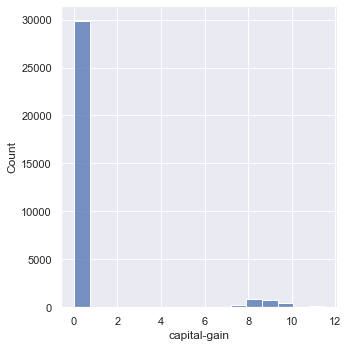

In [8]:
sns.displot(data['capital-gain'])

In [9]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

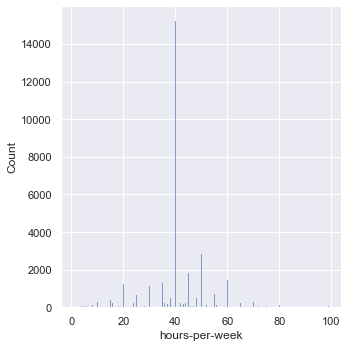

In [12]:
sns.displot(data['hours-per-week'])

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

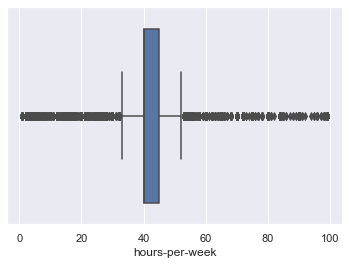

In [13]:
sns.boxplot(data['hours-per-week'])

In [14]:
def removeoutliers(data):
    iqr = data['hours-per-week'].quantile(0.75) - data['hours-per-week'].quantile(0.25)
    lower_range = data['hours-per-week'].quantile(0.25)-(1.5*iqr)
    upper_range = data['hours-per-week'].quantile(0.75) + (1.5*iqr)
    data.loc[data['hours-per-week'] <= lower_range, 'hours-per-week'] = lower_range
    data.loc[data['hours-per-week'] >= upper_range, 'hours-per-week'] = upper_range

In [15]:
removeoutliers(data)

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

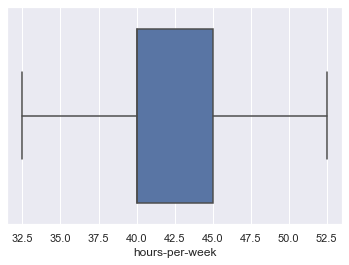

In [16]:
sns.boxplot(data['hours-per-week'])

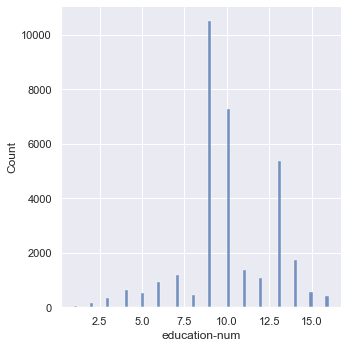

In [17]:
sns.displot(data['education-num'])

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

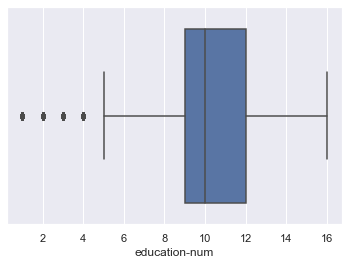

In [18]:
sns.boxplot(data['education-num'])

In [19]:
def remove_outlier_education_num(data):
    IQR = data['education-num'].quantile(0.75) - data['education-num'].quantile(0.25)
    
    lower_range = data['education-num'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['education-num'].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data['education-num'] <= lower_range, 'education-num'] = lower_range
    data.loc[data['education-num'] >= upper_range, 'education-num'] = upper_range

In [20]:
remove_outlier_education_num(data)

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

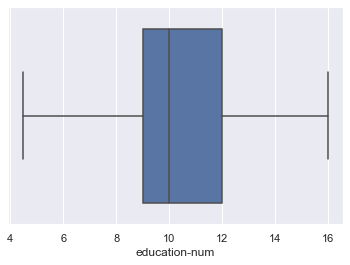

In [21]:
sns.boxplot(data['education-num'])

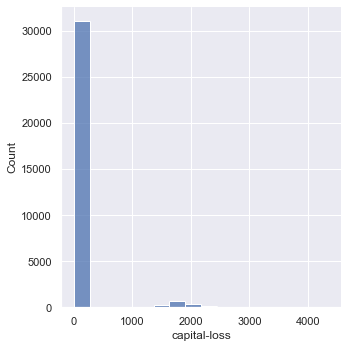

In [22]:
sns.displot(data['capital-loss'])

In [23]:
def capital_loss_log(data):
    data['capital-loss'] = np.where(data['capital-loss'] == 0, np.nan, data['capital-loss'])
    data['capital-loss'] = np.log(data['capital-loss'])
    data['capital-loss'] = data['capital-loss'].replace(np.nan, 0)

In [24]:
capital_loss_log(data)

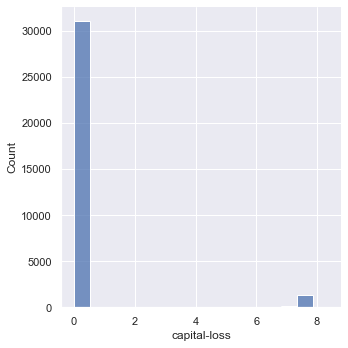

In [25]:
sns.displot(data['capital-loss'])

In [26]:
def remove_outlier_capital_loss(data):
    IQR = data['capital-loss'].quantile(0.75) - data['capital-loss'].quantile(0.25)
    
    lower_range = data['capital-loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['capital-loss'].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data['capital-loss'] <= lower_range, 'capital-loss'] = lower_range
    data.loc[data['capital-loss'] >= upper_range, 'capital-loss'] = upper_range

In [27]:
remove_outlier_capital_loss(data)

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

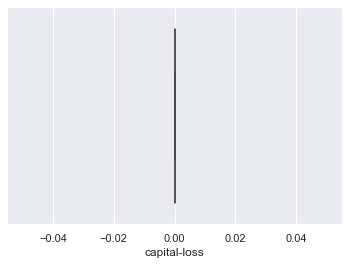

In [28]:
sns.boxplot(data['capital-loss'])

In [29]:
def labelling(data):
    data['sex'] = np.where(data['sex'] == 'Male' ,1,0)
    
    racelabel = {value: key for key, value in enumerate(data['race'].unique())}
    data['race'] = data['race'].map(racelabel)
    relationlabel = {value: key for key, value in enumerate(data['relationship'].unique())}
    data['relationship'] = data['relationship'].map(relationlabel)
    data['occupation'] = np.where(data['occupation'] == '?', 'Missing', data['occupation'])
    occulabel = {value: key for key, value in enumerate(data['occupation'].unique())}
    data['occupation'] = data['occupation'].map(occulabel)
    marrylabel = {value: key for key, value in enumerate(data['marital-status'].unique())}
    data['marital-status'] = data['marital-status'].map(marrylabel)
    label_enco_edu = {value: key for key, value in enumerate(data['education'].unique())}
    data['education'] = data['education'].map(label_enco_edu)
    data['workclass'] = np.where(data['workclass'] == '?', 'Missing', data['workclass'])
    label_enco_workclass = {value: key for key, value in enumerate(data['workclass'].unique())}
    data['workclass'] = data['workclass'].map(label_enco_workclass)
    data['native-country'] = np.where(data['native-country'] == '?', 'Missing', data['native-country'])
    label_enco_workclass = {value: key for key, value in enumerate(data['native-country'].unique())}
    data['native-country'] = data['native-country'].map(label_enco_workclass)

<AxesSubplot:>

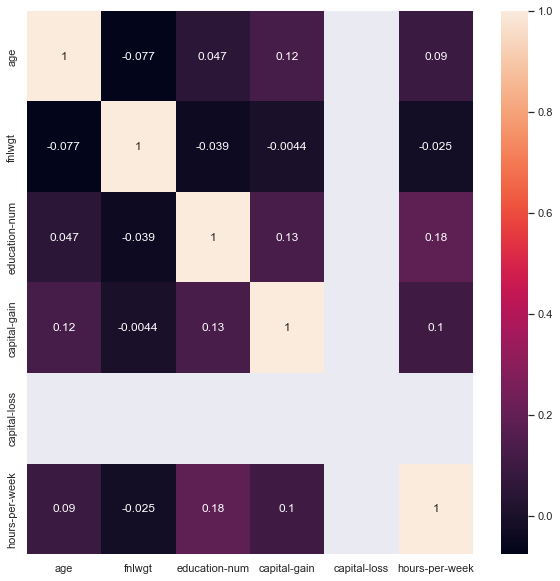

In [30]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

In [31]:
data = data.drop('fnlwgt', axis=1)

In [32]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [33]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [34]:
labelling(data)

In [35]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,<=50K
1,50,1,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,<=50K
2,38,2,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,<=50K
3,53,2,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,<=50K
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,<=50K


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
sc = StandardScaler()

In [40]:
x = data.iloc[:,: -1].values

In [41]:
x

array([[39. ,  0. ,  0. , ...,  0. , 40. ,  0. ],
       [50. ,  1. ,  0. , ...,  0. , 32.5,  0. ],
       [38. ,  2. ,  1. , ...,  0. , 40. ,  0. ],
       ...,
       [58. ,  2. ,  1. , ...,  0. , 40. ,  0. ],
       [22. ,  2. ,  1. , ...,  0. , 32.5,  0. ],
       [52. ,  6. ,  1. , ...,  0. , 40. ,  0. ]])

In [42]:
y = data.iloc[:, -1].values

In [43]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [45]:
x = sc.fit_transform(x)

In [46]:
x

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [47]:
x_train, x_test, y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression

In [51]:
reg = LogisticRegression()

LogisticRegression()

In [52]:
reg.fit(x_train, y_train)

LogisticRegression()

In [53]:
ped = reg.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
accuracy_score(Y_test, ped)

0.8018670924947795